# Laboratorio 1 - Preparación y Visualización de Datos

## Grupo 1 - Paula Hípola Gómez, José Ignacio Navas Sanz y Belén Ortega Pérez

## Entregable 2 - Netflix

### 2.1- Confirma o desmiente la hipótesis de que las series han desbancado a las películas en la oferta de Netflix.

In [2]:
%config IPCompleter.greedy=True

#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Deberiamos analizar el numero de películas vs el numero de serie....
#Importamos el CSV de Netflix
df_netflix = pd.read_csv('netflix.csv')
#Visualizamos los datos
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [3]:
#Preprocesamiento de datos
#Miramos si hay peliculas o series faltantes (Sin Titulo)
titulos = df_netflix['title']
print('Hay',titulos.isnull().sum(),'datos sin título')

#Miramos si hay peliculas repetidas
titulosDuplicados = df_netflix.duplicated().sum()
print('Hay',titulosDuplicados,'titulos duplicados')

Hay 0 datos sin título
Hay 0 titulos duplicados


In [4]:
#Tamaño del dataset
print('El Dataset tiene',df_netflix.shape[0],'instancias y',df_netflix.shape[1],'atributos');

#Sacamos los diferentes tipos
tipos = df_netflix["type"]
print('Los valores para clasiicar en el dataset disponibles son:',set(tipos))

#Numero de peliculas
peliculas = tipos[tipos=="Movie"].count()
#Numeros de series
series = tipos[tipos=="TV Show"].count()

#Resultados
print('En el Dataset hay',peliculas,'peliculas y',series,'series')
print('Para comprobar si hay algo diferente de pelicula o serie, sumamos el numero de ambas')

#Suma de peliculas y series. Deberá ser igual al número total de instancias del dataset
pelisYSeries = peliculas+series

#Comprobamos que solo haya peliculas y series
if pelisYSeries == tipos.shape[0]:
    print('Hay solo datos de películas y series, no hay ninguna etiqueta más para tipificar')
else:
    print('Hay otro tipo de etiqueta diferente a TV Show o Movie')


El Dataset tiene 6234 instancias y 12 atributos
Los valores para clasiicar en el dataset disponibles son: {'Movie', 'TV Show'}
En el Dataset hay 4265 peliculas y 1969 series
Para comprobar si hay algo diferente de pelicula o serie, sumamos el numero de ambas
Hay solo datos de películas y series, no hay ninguna etiqueta más para tipificar


### 2.1.1- (1 punto) Encuentra el número de películas vs número de series disponibles totales ¿Qué porcentaje del contenido representa cada categoría? Muéstralo en un gráfico justificando la elección del tipo de gráfico.

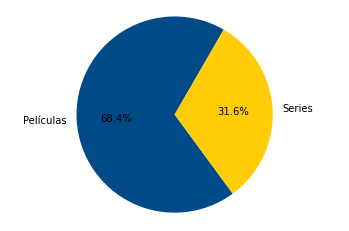

In [5]:
#Hemos encontrado que hay 4265 peliculas y 1969 series
#PieChart
labels = 'Películas','Series'
sizes = [peliculas,series]
colors = ['#004B87', '#FFCD07']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=False, startangle=60, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### 2.1.2- (1 punto) Estudia el número de películas vs número de series disponibles por año de publicación en Netflix. Para eso, crea un gráfico que muestre la evolución temporal (por años) de la cantidad de series y de películas disponibles en la plataforma. Justifica el gráfico elegido y explica la tendencia que observas en los datos. ¿Qué conclusión puedes extraer?

In [6]:
#Dataframe con - Tipo / Titulo / Año de Publicacion
df_Netflix2 = df_netflix[['type','title','release_year']]
#Realmente no necesitamos el título, si bien, nos ayuda a entender los datos mejor

pelisPorAnio = df_Netflix2[(df_Netflix2['type'] == 'Movie') & (df_Netflix2['release_year'] == 2018)]

years = set(df_Netflix2.iloc[:,2])

pelisTotales = 0
seriesTotales = 0
numAnios = 0;

arrayPelis = []
arraySeries = []

for year in years:
    pelisPorAnio = df_Netflix2[(df_Netflix2['type'] == 'Movie') & (df_Netflix2['release_year'] == year)]
    seriesPorAnio = df_Netflix2[(df_Netflix2['type'] == 'TV Show') & (df_Netflix2['release_year'] == year)]
    print('En el año',year,'Netflix lanzó',pelisPorAnio.shape[0],'peliculas y',seriesPorAnio.shape[0],'series')
    pelisTotales += pelisPorAnio.shape[0]
    seriesTotales += seriesPorAnio.shape[0]
    arrayPelis.append(pelisPorAnio.shape[0])
    arraySeries.append(seriesPorAnio.shape[0])
    numAnios += 1


En el año 1925 Netflix lanzó 0 peliculas y 1 series
En el año 1942 Netflix lanzó 2 peliculas y 0 series
En el año 1943 Netflix lanzó 3 peliculas y 0 series
En el año 1944 Netflix lanzó 3 peliculas y 0 series
En el año 1945 Netflix lanzó 3 peliculas y 0 series
En el año 1946 Netflix lanzó 2 peliculas y 1 series
En el año 1947 Netflix lanzó 1 peliculas y 0 series
En el año 1954 Netflix lanzó 1 peliculas y 0 series
En el año 1955 Netflix lanzó 1 peliculas y 0 series
En el año 1956 Netflix lanzó 1 peliculas y 0 series
En el año 1958 Netflix lanzó 2 peliculas y 0 series
En el año 1959 Netflix lanzó 1 peliculas y 0 series
En el año 1960 Netflix lanzó 4 peliculas y 0 series
En el año 1962 Netflix lanzó 3 peliculas y 0 series
En el año 1963 Netflix lanzó 0 peliculas y 1 series
En el año 1964 Netflix lanzó 1 peliculas y 0 series
En el año 1965 Netflix lanzó 2 peliculas y 0 series
En el año 1966 Netflix lanzó 1 peliculas y 0 series
En el año 1967 Netflix lanzó 2 peliculas y 1 series
En el año 19

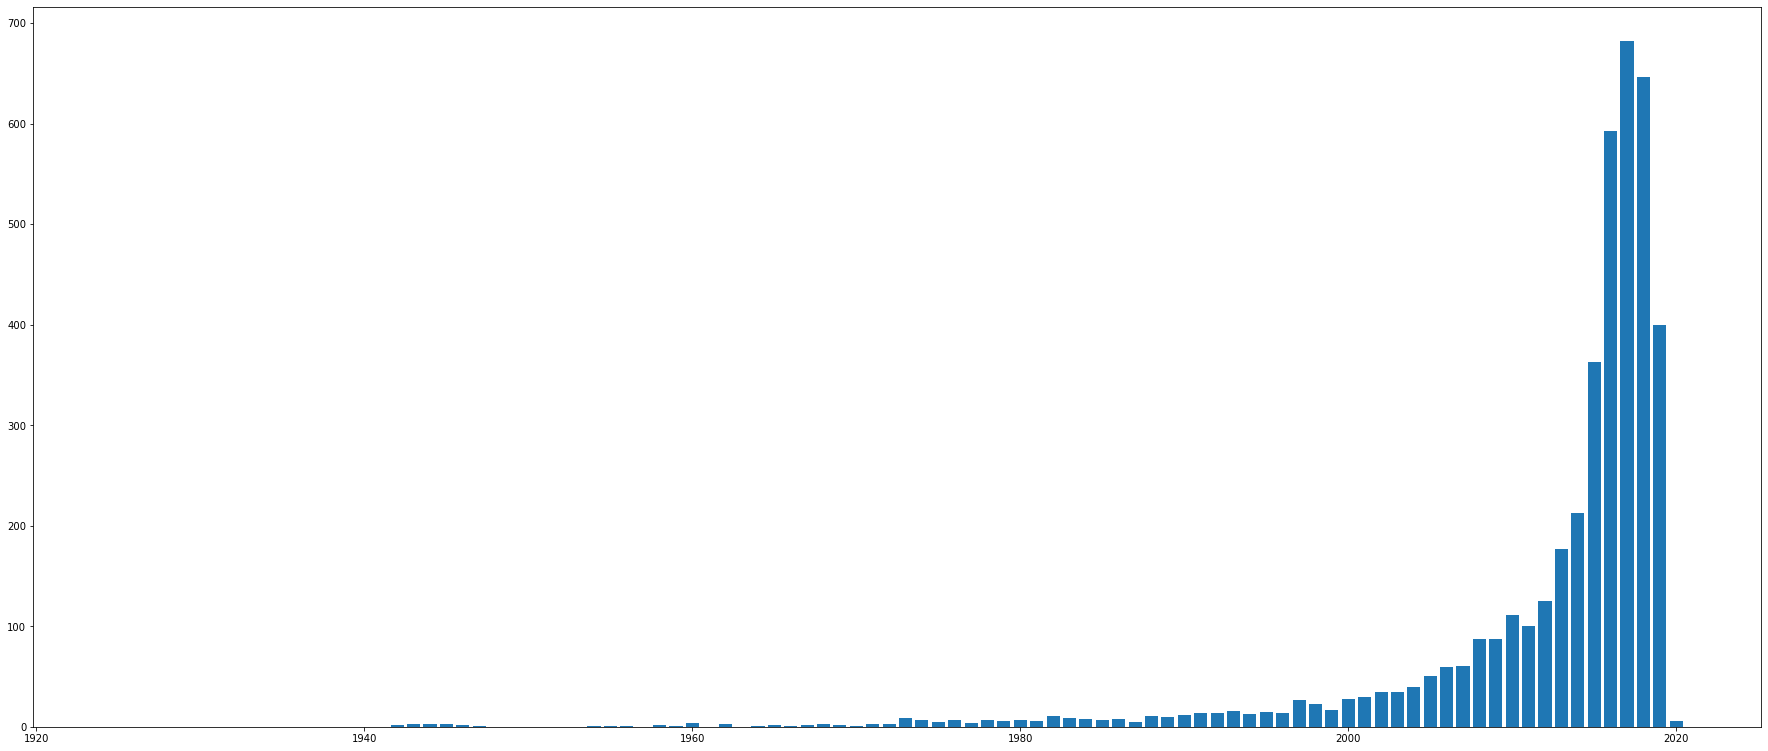

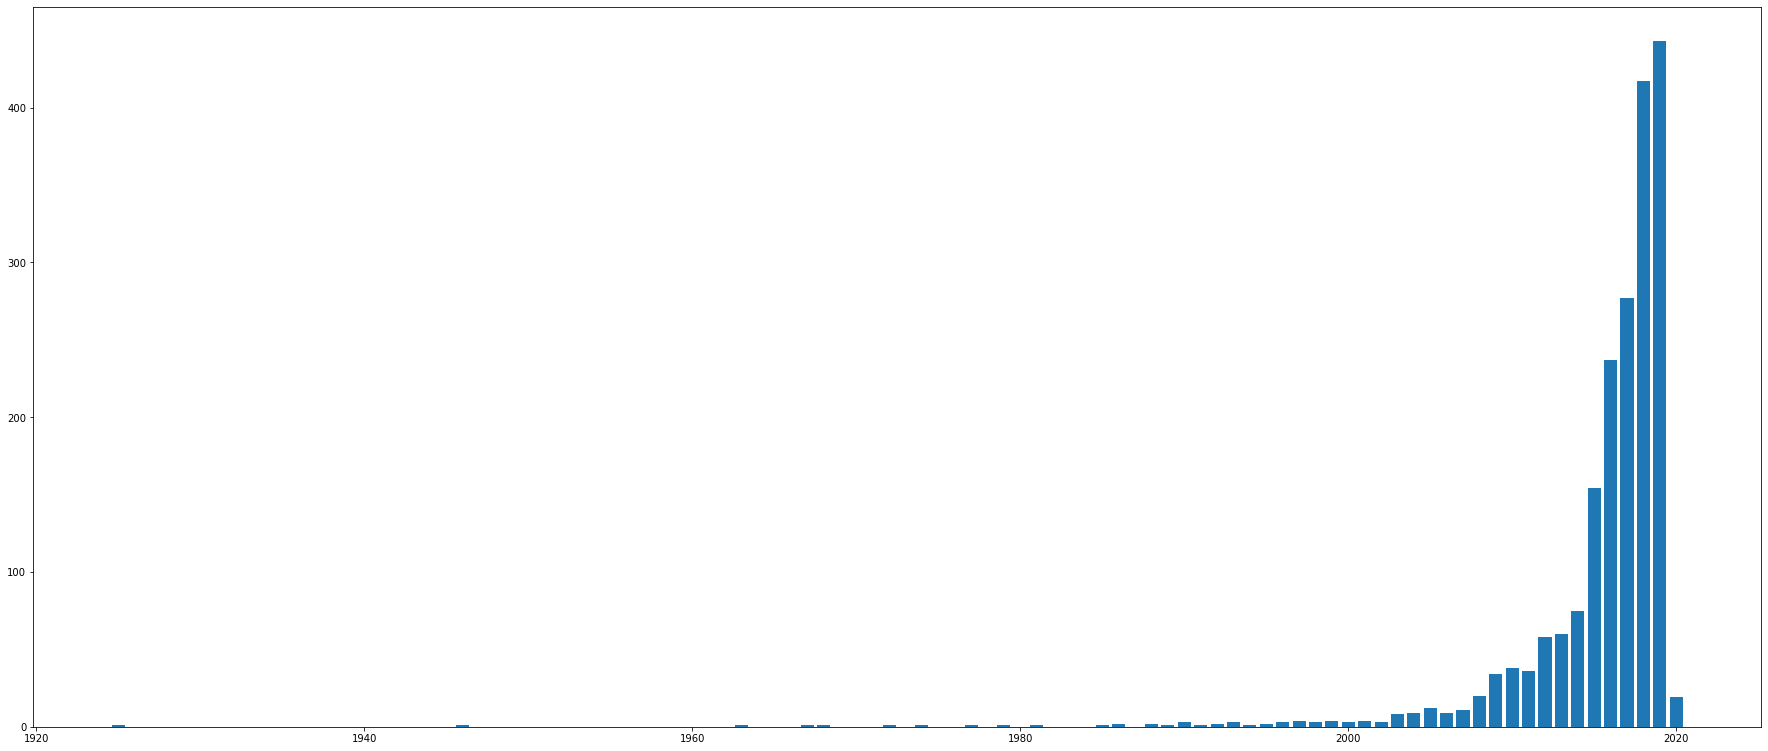

In [7]:
x = list(years)
y = arrayPelis
z = arraySeries

figura = plt.figure(figsize=(24, 10))
ejes = figura.add_axes([0,0,1,1])
ejeX = x
ejeY = y
ejes.bar(ejeX,ejeY)
plt.show()

figura2 = plt.figure(figsize=(24, 10))
ejes = figura2.add_axes([0,0,1,1])
ejeX = x
ejeY = z
ejes.bar(ejeX,ejeY)
plt.show()

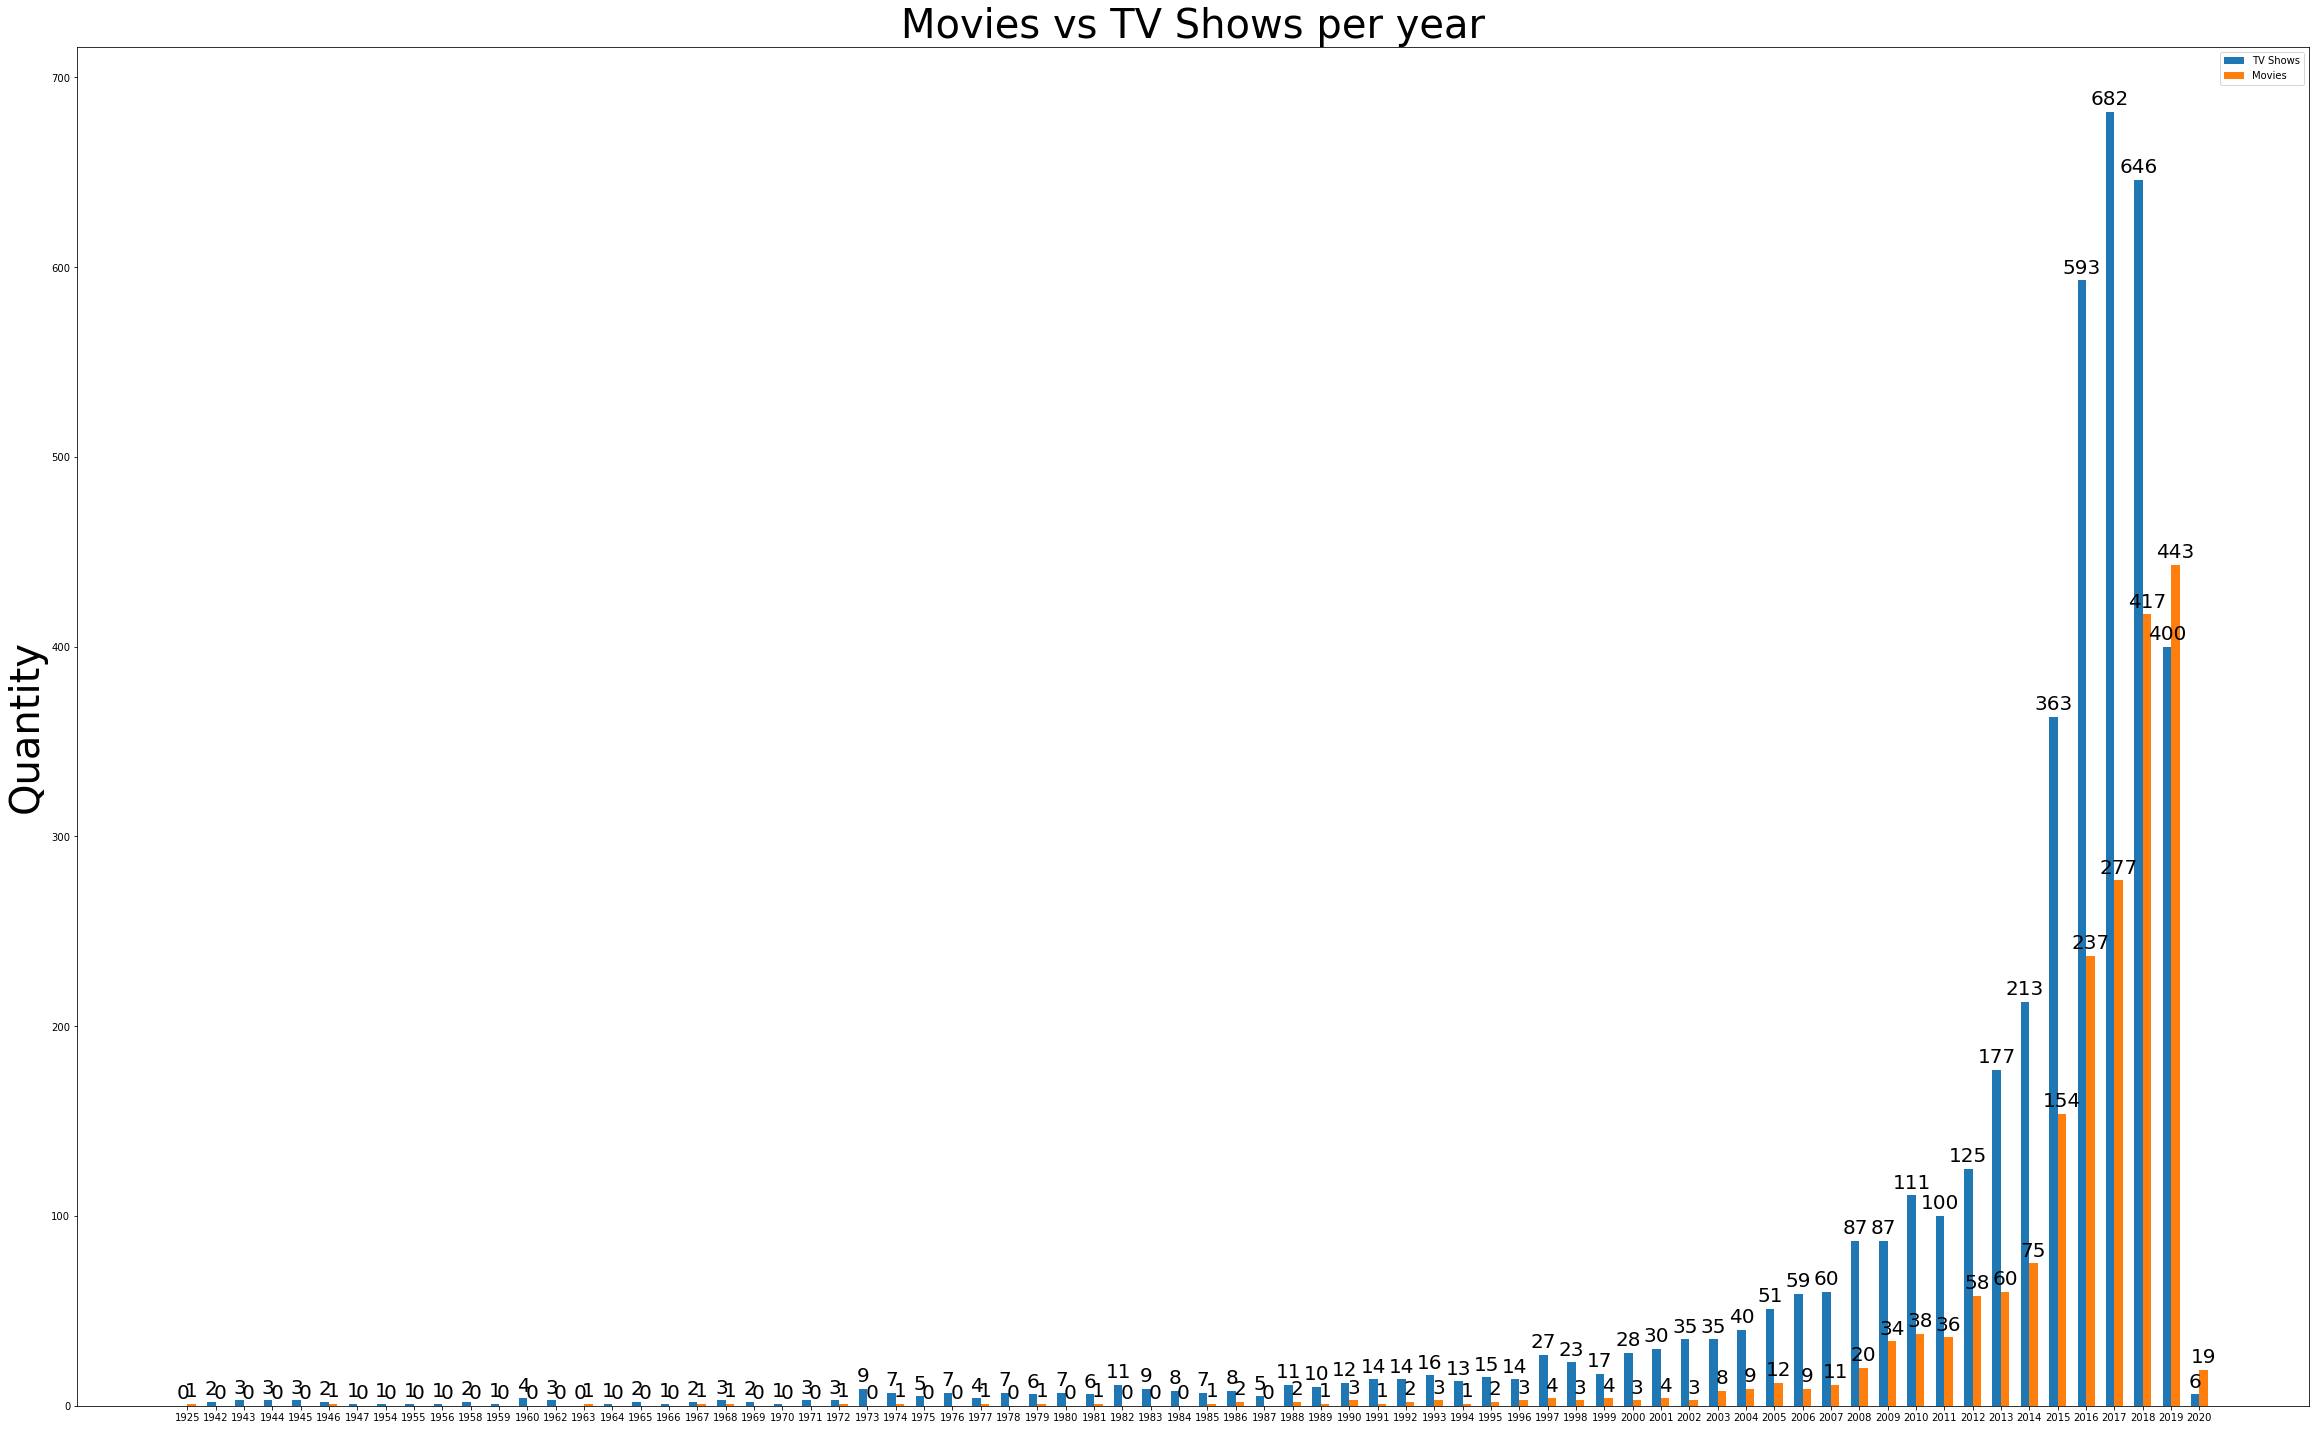

In [80]:
labels = years
men_means = arrayPelis
women_means = arraySeries

x = np.arange(len(labels))  # the label locations
width = .3  # the width of the bars

fig, ax = plt.subplots(figsize=(40,25))
rects1 = ax.bar(x - width/2, men_means, width, label='TV Shows')
rects2 = ax.bar(x + width/2, women_means, width, label='Movies')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Quantity',fontsize=40)
ax.set_title('Movies vs TV Shows per year',fontsize=40)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=20)

autolabel(rects1)
autolabel(rects2)

plt.show()

## NO ME GUSTA ESTE GRÁFICO HAY QUE PENSAR EN UNA ALTERNATIVA

### 2.2- (0.5 puntos) Estudia la viabilidad de la plataforma Netflix ¿se sigue añadiendo contenido o hay una tendencia a la baja? Es decir, ¿la plataforma sigue creciendo o se pueden apreciar signos de desaceleración?

#### Para esto muestra la cantidad de contenido añadido a la plataforma por años. Justifica el gráfico elegido y explica la tendencia observada.

In [113]:
#Debemos mirar si sumando peliculas y series por años, se han ido añadiendo más o menos contenidos
arrayTotal = []

#Para cada uno de los años
for year in years:
    pelisPorAnio = df_Netflix2[(df_Netflix2['type'] == 'Movie') & (df_Netflix2['release_year'] == year)]
    seriesPorAnio = df_Netflix2[(df_Netflix2['type'] == 'TV Show') & (df_Netflix2['release_year'] == year)]
    arrayTotal.append(pelisPorAnio.shape[0] + seriesPorAnio.shape[0])
    numAnios += 1
    
list(arrayTotal)

[1,
 2,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 4,
 3,
 1,
 1,
 2,
 1,
 3,
 4,
 2,
 1,
 3,
 4,
 9,
 8,
 5,
 7,
 5,
 7,
 7,
 7,
 7,
 11,
 9,
 8,
 8,
 10,
 5,
 13,
 11,
 15,
 15,
 16,
 19,
 14,
 17,
 17,
 31,
 26,
 21,
 31,
 34,
 38,
 43,
 49,
 63,
 68,
 71,
 107,
 121,
 149,
 136,
 183,
 237,
 288,
 517,
 830,
 959,
 1063,
 843,
 25]

### 2.3-Estudio del momento de aparición del contenido en Netflix. 

### 2.3.1-(1 punto) ¿Cuál es el retraso medio en publicar una película en Netflix? ¿Y para una serie? ¿hay variación en este retraso a lo largo de los años? Visualiza los datos utilizando los gráficos más adecuados justificando su elección.¿Crees que este reflejo de la actividad de la plataforma es un indicativo de su viabilidad y proyección? Justifica la respuesta preferiblemente apoyándote en los datos. 

### 2.3.2-(1 punto) ¿Hay un momento preferido en el año para publicar un contenido? Es decir, ¿hay algún momento del año en el que se ponga más contenido disponible? Para averiguar esto, estudia la media de contenido publicado para cada mes durante el tiempo de vida de Netflix. ¿Hay diferencias si se trata de una película o de una serie? Utiliza de manera justificada los gráficos correspondientes para respaldar tus respuestas. 